In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


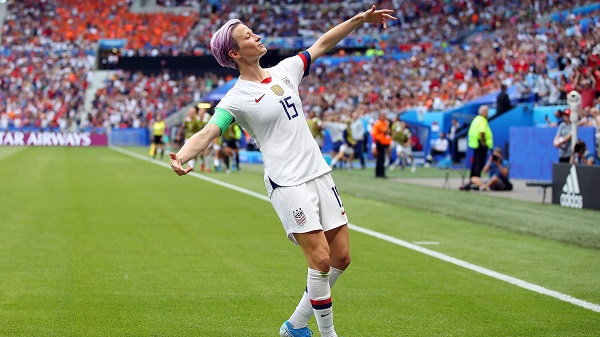

In [ ]:
image = cv2.imread("/content/drive/MyDrive/ColabDrive/Computer_Vision_Masterclass/Images/megan.jpg")
cv2_imshow(image)

In [ ]:
image.shape

(337, 600, 3)

In [ ]:
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0/255, size=(image.shape[1], image.shape[0]))
image_blob.shape

(1, 3, 337, 600)

In [ ]:
network = cv2.dnn.readNetFromCaffe("/content/drive/MyDrive/ColabDrive/Computer_Vision_Masterclass/Weights/pose_deploy_linevec_faster_4_stages.prototxt",
                                   "/content/drive/MyDrive/ColabDrive/Computer_Vision_Masterclass/Weights/pose_iter_160000.caffemodel")

In [ ]:
network.getLayerNames()

In [ ]:
len(network.getLayerNames())

127

In [ ]:
network.setInput(image_blob)
output = network.forward()
output.shape

(1, 44, 43, 75)

In [ ]:
position_width = output.shape[3]
position_height = output.shape[2]
num_points = 15
points = []
threshold = 0.1
points = []
for i in range(num_points): #각 body point에 대해 확률을 구함
  confidence_map = output[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  x = int(image.shape[1] * point[0]/position_width)
  y = int(image.shape[0] * point[1]/position_height)
  if confidence >threshold:
    cv2.circle(image,(x,y), 1, (0,255,255))
    cv2.putText(image, '{}'.format(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0,0,255))
    points.append((x,y))
  else:
    points.append(None)

<Figure size 640x480 with 0 Axes>

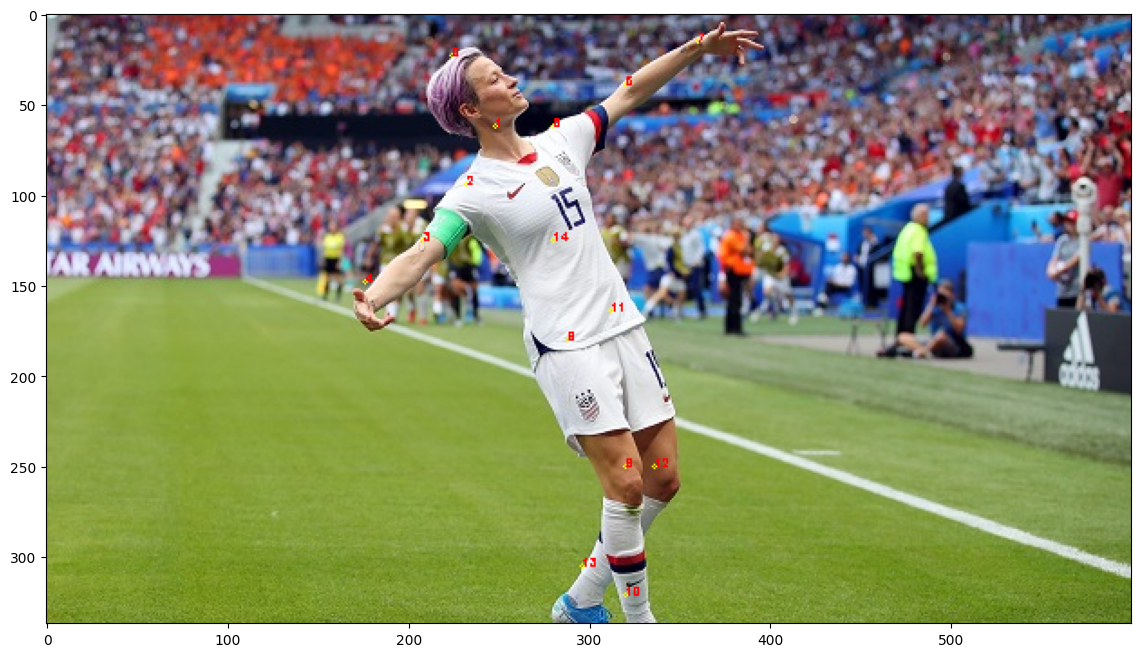

In [ ]:
plt.clf()
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

<Figure size 640x480 with 0 Axes>

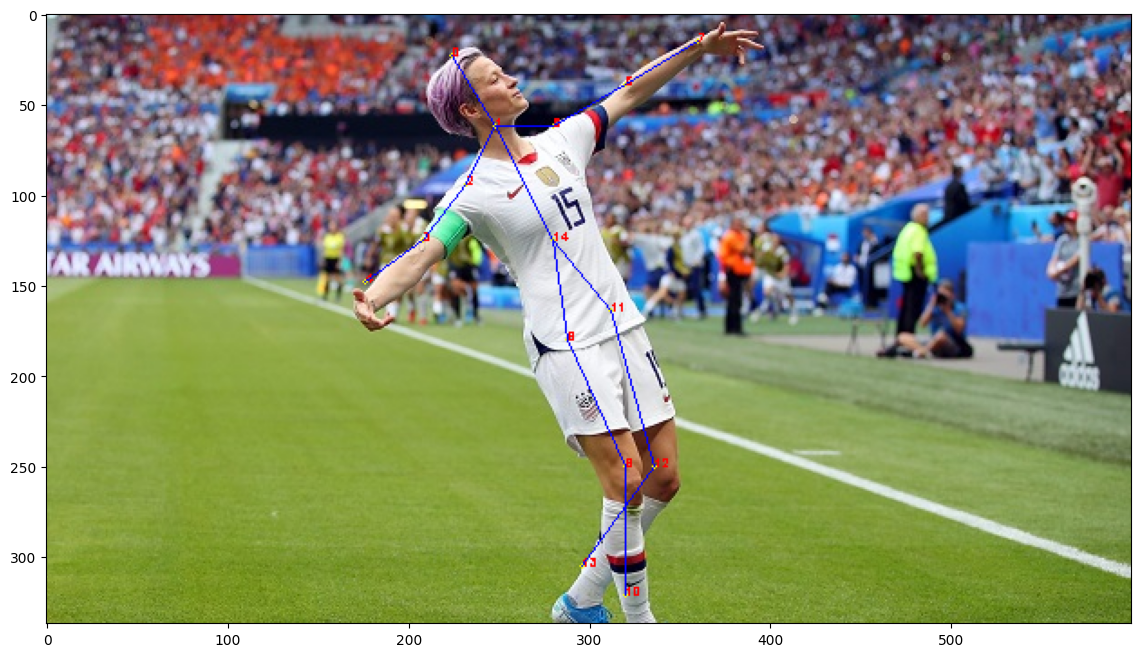

In [ ]:
point_connections = [ [0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
for connection in point_connections:
  partA = connection[0]
  partB = connection[1]
  if points[partA] and points[partB]:
    cv2.line(image, points[partA], points[partB], (255,0,0))
plt.clf()
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

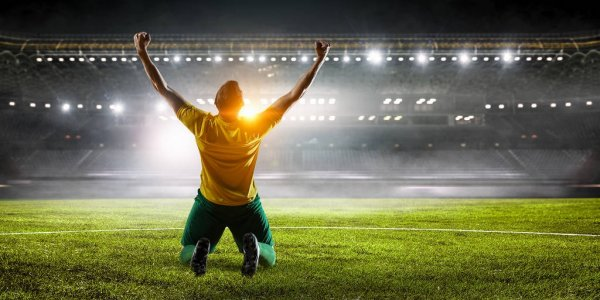

In [ ]:
image = cv2.imread("/content/drive/MyDrive/ColabDrive/Computer_Vision_Masterclass/Images/player.jpg")
cv2_imshow(image)

In [ ]:
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0/255, size=(image.shape[1], image.shape[0]))
network.setInput(image_blob)
output = network.forward()
position_width = output.shape[3]
position_height = output.shape[2]
num_points = 15
points = []
threshold = 0.1
points = []
for i in range(num_points): #각 body point에 대해 확률을 구함
  confidence_map = output[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  x = int(image.shape[1] * point[0]/position_width)
  y = int(image.shape[0] * point[1]/position_height)
  if confidence >threshold:
    cv2.circle(image,(x,y), 3, (100,255,155))
    #cv2.putText(image, '{}'.format(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255))
    cv2.putText(image, '{}-{}'.format(point[0], point[1]), (x,y+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255))
    points.append((x,y))
  else:
    points.append(None)

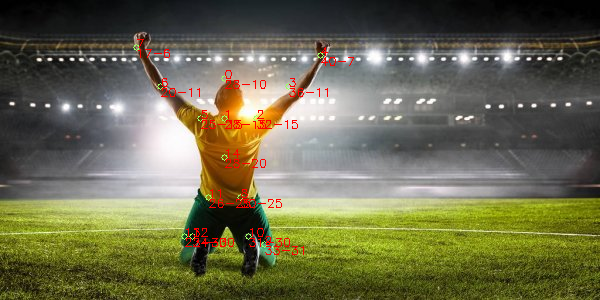

In [ ]:
cv2_imshow(image)

In [ ]:
def varify_arms_up(points):
  head, r_wrist, l_wrist = 0, 0, 0
  for i, point in enumerate(points):
    if i ==0:
      head = point[1]
    elif i == 4:
      r_wrist = point[1]
    elif i == 7:
      l_wrist = point[1]
  if r_wrist > head and l_wrist>head:
    return True
  else :
    return False